In [33]:
import pandas as pd

In [34]:
data=pd.read_excel('data1.xlsx')
for i in range(2,15):
    d=pd.read_excel('data'+str(i)+'.xlsx')
    data=pd.concat([data,d],axis=0,ignore_index=True)

In [35]:
data.shape

(1205, 3)

In [36]:
data

,Name,Comment,Label
0,মোহাম্মদ সোহেল রানা,খেললো কানাডাজিতলো লেংড়াডা,3.0
1,Preetom Mazumder,"Like I said, World Cup of Goalkeepers",NaN
2,Mizanur Rahman Rupok,Well played Canada 🇨🇦🇨🇦🇨🇦 bed luck..,NaN
3,Mohammed Ahmad,"৫০ধাপ নিচের দল থেকে হারের পর ও যারা চেঁচায়, তা...",3.0
4,Tarek Aziz,কানাডার ভাগ্য খারাপ না হয় বেলজিয়ামের খারাপ খবর...,2.0
...,...,...,...
1200,Opu Arshad,রোনাল্ডো পেনাল্টি পাওয়ায় সেটা উপহার। আর সৌদির ...,6.0
1201,মাহমুদ মৌসুম,জ্বলে..?.,5.0
1202,Mohammad Sahalom,রোনালদোর প্রথম করা গোলটি তাহলে কেমনে ডিসএলাও হ...,3.0
1203,Saiful Islam,তাও আবার রেফারি গিফট পেনাল্টিতে 🤣,1.0


In [37]:
data.to_excel('merged_data.xlsx',index=False)

In [39]:
print("Total Comments:",len(data),
      "\nStatements:",len(data[data.Label==1]),
      "\nCriticism:",len(data[data.Label==2]),
      "\nOffensive:",len(data[data.Label==3]),
      "\nProposition:",len(data[data.Label==4]),
      "\nInterrogation:",len(data[data.Label==5]),
      "\nSarcasm:",len(data[data.Label==6]),
      "\nIrrelevant:",len(data[data.Label==7]),)

Total Comments: 1205 
Statements: 303 
Criticism: 164 
Offensive: 256 
Proposition: 37 
Interrogation: 44 
Sarcasm: 178 
Irrelevant: 6


In [40]:


# print some unprocessed reviews
sample_data = [10,100,150,200,250,600,650,666,689,640,650,700,750,800,1000]
for i in sample_data:
      print(data.Comment[i],'\n','Sentiment:-- ',data.Label[i],'\n')



বর্তমান সময়ের বিশ্বের অন্যতম সেরা গোলরক্ষক কর্তুয়া 
 Sentiment:--  1.0 

তোর মত বলদ লোককে লাথি মেরে বাংলাদেশ থেকে পাঠিয়ে দেওয়া হউক 
 Sentiment:--  3.0 

ঐ দশ বছর প্লেয়ারদের চলবে না, চলবে তোগো, এইটা ডাইরেক্ট কইলেও পারতি!! 
 Sentiment:--  3.0 

7up er ভয় তাড়া করে বেড়ায় 😂😂। 
 Sentiment:--  6.0 

মানুষকে পোস্টের উপর আগ্রহী করার জন্য আবাল চো* সাংবাদিকরা কতো কৌশল ব্যবহার করে থাকে।খুজ নিলে দেখা যাবে, প্রথম আলোর এমডি আর্জেন্টিনার সাপোর্টার। 
 Sentiment:--  3.0 

akjon manus mara gase ai khane koto gula sotolok ha ha dise, Manuser hayat likhito, khela na dekle o oi lok ai somoye e mara jeto. ja Allah agey nirdharon kore disen 
 Sentiment:--  nan 

আল্লাহ্ ওনাকে জান্নাত দান করুন,, আর ওনার জীবনে ভুল ত্রুটি থাকলে মাপ করে দিন,,,,  কার কখন আবেগে আগাত লাগে কেউ জানি না,,  সবাইকে মেনে নেওয়ার ক্ষমতা দিন🤲🤲 
 Sentiment:--  1.0 

দুঃখজনক।কুমিল্লা এভাবে আলোচনায় আসলো সংবাদমাধ্যমে। 
 Sentiment:--  1.0 

আর্জেন্টিনার আযান দেওয়া নিষেধব্রাজিলেও আমাদের আজান দেওয়া নিষেধঅথচ সৌদি আরব আমাদের মুসলমান রাষ্ট্রসৌদির 

In [41]:
#drop the rows with Label==nan
data.dropna(subset=['Label'],inplace=True)

In [42]:
data.shape

(988, 3)

In [43]:
print("Total Comments:",len(data),
      "\nStatements:",len(data[data.Label==1]),
      "\nCriticism:",len(data[data.Label==2]),
      "\nOffensive:",len(data[data.Label==3]),
      "\nProposition:",len(data[data.Label==4]),
      "\nInterrogation:",len(data[data.Label==5]),
      "\nSarcasm:",len(data[data.Label==6]),
      "\nIrrelevant:",len(data[data.Label==7]),)

Total Comments: 988 
Statements: 303 
Criticism: 164 
Offensive: 256 
Proposition: 37 
Interrogation: 44 
Sarcasm: 178 
Irrelevant: 6


In [44]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer

e:\Installation\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


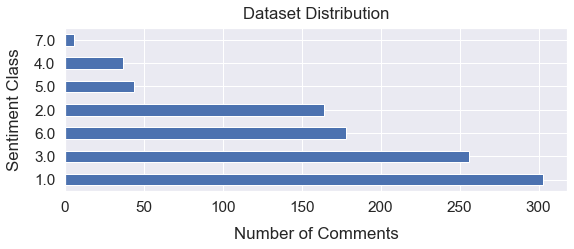

In [46]:
sns.set(font_scale=1.4)
data['Label'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Sentiment Class", labelpad=12)
plt.yticks(rotation = 0)
plt.title("Dataset Distribution", y=1.02);

In [47]:


# Data cleaning function
def process_comments(Comment): 
    Comment = re.sub('[^\u0980-\u09FF]',' ',str(Comment)) #removing unnecessary punctuation
    return Comment



In [48]:
data.columns

Index(['Name', 'Comment', 'Label'], dtype='object')

In [49]:


# Apply the function into the dataframe
data['cleaned'] = data['Comment'].apply(process_comments)  

In [51]:
data.head(50)

,Name,Comment,Label,cleaned
0,মোহাম্মদ সোহেল রানা,খেললো কানাডাজিতলো লেংড়াডা,3.0,খেললো কানাডাজিতলো লেংড়াডা
3,Mohammed Ahmad,"৫০ধাপ নিচের দল থেকে হারের পর ও যারা চেঁচায়, তা...",3.0,৫০ধাপ নিচের দল থেকে হারের পর ও যারা চেঁচায় তা...
4,Tarek Aziz,কানাডার ভাগ্য খারাপ না হয় বেলজিয়ামের খারাপ খবর...,2.0,কানাডার ভাগ্য খারাপ না হয় বেলজিয়ামের খারাপ খবর...
5,Parvej Sheikh,তবে খেলা ভালো হয়েছে।।,2.0,তবে খেলা ভালো হয়েছে
6,এইচ আর আবির,অভিনন্দন প্রিয় বেলজিয়াম 🇧🇪❤️তবে আরো ভালো খেল...,2.0,অভিনন্দন প্রিয় বেলজিয়াম তবে আরো ভালো খেল...
7,Faysal Ahamed,ভালো খেললেই জিতা জায় না এটা তার প্রমান 😂,2.0,ভালো খেললেই জিতা জায় না এটা তার প্রমান
8,Md Kamruzzaman,যদিও ১-০ গোলে হারছে। তবুও এই কানাডা দূর্দান্ত ...,2.0,যদিও ১ ০ গোলে হারছে তবুও এই কানাডা দূর্দান্ত ...
9,Mia Ashik,২০১৮ সালের বেলজিয়ামকে খুঁজে পাচ্ছি না 🇧🇪😪বেলজি...,2.0,২০১৮ সালের বেলজিয়ামকে খুঁজে পাচ্ছি না বেলজি...
10,Zahadul Islam Parvez,বর্তমান সময়ের বিশ্বের অন্যতম সেরা গোলরক্ষক কর্...,1.0,বর্তমান সময়ের বিশ্বের অন্যতম সেরা গোলরক্ষক কর্...
12,M Russell Islam Raz,একটা ভালো ফিনিশারের অভাবে এত ভালো খেলেও শেষ পর...,2.0,একটা ভালো ফিনিশারের অভাবে এত ভালো খেলেও শেষ পর...


In [52]:
#length of the comments
data['length'] = data['cleaned'].apply(lambda x: len(x.split()))

In [53]:
data.head(20)

,Name,Comment,Label,cleaned,length
0,মোহাম্মদ সোহেল রানা,খেললো কানাডাজিতলো লেংড়াডা,3.0,খেললো কানাডাজিতলো লেংড়াডা,3
3,Mohammed Ahmad,"৫০ধাপ নিচের দল থেকে হারের পর ও যারা চেঁচায়, তা...",3.0,৫০ধাপ নিচের দল থেকে হারের পর ও যারা চেঁচায় তা...,14
4,Tarek Aziz,কানাডার ভাগ্য খারাপ না হয় বেলজিয়ামের খারাপ খবর...,2.0,কানাডার ভাগ্য খারাপ না হয় বেলজিয়ামের খারাপ খবর...,24
5,Parvej Sheikh,তবে খেলা ভালো হয়েছে।।,2.0,তবে খেলা ভালো হয়েছে,4
6,এইচ আর আবির,অভিনন্দন প্রিয় বেলজিয়াম 🇧🇪❤️তবে আরো ভালো খেল...,2.0,অভিনন্দন প্রিয় বেলজিয়াম তবে আরো ভালো খেল...,10
7,Faysal Ahamed,ভালো খেললেই জিতা জায় না এটা তার প্রমান 😂,2.0,ভালো খেললেই জিতা জায় না এটা তার প্রমান,8
8,Md Kamruzzaman,যদিও ১-০ গোলে হারছে। তবুও এই কানাডা দূর্দান্ত ...,2.0,যদিও ১ ০ গোলে হারছে তবুও এই কানাডা দূর্দান্ত ...,71
9,Mia Ashik,২০১৮ সালের বেলজিয়ামকে খুঁজে পাচ্ছি না 🇧🇪😪বেলজি...,2.0,২০১৮ সালের বেলজিয়ামকে খুঁজে পাচ্ছি না বেলজি...,11
10,Zahadul Islam Parvez,বর্তমান সময়ের বিশ্বের অন্যতম সেরা গোলরক্ষক কর্...,1.0,বর্তমান সময়ের বিশ্বের অন্যতম সেরা গোলরক্ষক কর্...,7
12,M Russell Islam Raz,একটা ভালো ফিনিশারের অভাবে এত ভালো খেলেও শেষ পর...,2.0,একটা ভালো ফিনিশারের অভাবে এত ভালো খেলেও শেষ পর...,14


In [57]:
#count the number of comments with length equal to 0
data[data['length']==0].shape


(1, 5)

In [58]:
#drop the rows with length==0
data.drop(data[data['length']==0].index,inplace=True)

In [59]:
data.shape

(987, 5)

In [60]:
data

,Name,Comment,Label,cleaned,length
0,মোহাম্মদ সোহেল রানা,খেললো কানাডাজিতলো লেংড়াডা,3.0,খেললো কানাডাজিতলো লেংড়াডা,3
3,Mohammed Ahmad,"৫০ধাপ নিচের দল থেকে হারের পর ও যারা চেঁচায়, তা...",3.0,৫০ধাপ নিচের দল থেকে হারের পর ও যারা চেঁচায় তা...,14
4,Tarek Aziz,কানাডার ভাগ্য খারাপ না হয় বেলজিয়ামের খারাপ খবর...,2.0,কানাডার ভাগ্য খারাপ না হয় বেলজিয়ামের খারাপ খবর...,24
5,Parvej Sheikh,তবে খেলা ভালো হয়েছে।।,2.0,তবে খেলা ভালো হয়েছে,4
6,এইচ আর আবির,অভিনন্দন প্রিয় বেলজিয়াম 🇧🇪❤️তবে আরো ভালো খেল...,2.0,অভিনন্দন প্রিয় বেলজিয়াম তবে আরো ভালো খেল...,10
...,...,...,...,...,...
1200,Opu Arshad,রোনাল্ডো পেনাল্টি পাওয়ায় সেটা উপহার। আর সৌদির ...,6.0,রোনাল্ডো পেনাল্টি পাওয়ায় সেটা উপহার আর সৌদির ...,11
1201,মাহমুদ মৌসুম,জ্বলে..?.,5.0,জ্বলে,1
1202,Mohammad Sahalom,রোনালদোর প্রথম করা গোলটি তাহলে কেমনে ডিসএলাও হ...,3.0,রোনালদোর প্রথম করা গোলটি তাহলে কেমনে ডিসএলাও হ...,10
1203,Saiful Islam,তাও আবার রেফারি গিফট পেনাল্টিতে 🤣,1.0,তাও আবার রেফারি গিফট পেনাল্টিতে,5


In [61]:
data.reset_index(drop=True,inplace=True)
data

,Name,Comment,Label,cleaned,length
0,মোহাম্মদ সোহেল রানা,খেললো কানাডাজিতলো লেংড়াডা,3.0,খেললো কানাডাজিতলো লেংড়াডা,3
1,Mohammed Ahmad,"৫০ধাপ নিচের দল থেকে হারের পর ও যারা চেঁচায়, তা...",3.0,৫০ধাপ নিচের দল থেকে হারের পর ও যারা চেঁচায় তা...,14
2,Tarek Aziz,কানাডার ভাগ্য খারাপ না হয় বেলজিয়ামের খারাপ খবর...,2.0,কানাডার ভাগ্য খারাপ না হয় বেলজিয়ামের খারাপ খবর...,24
3,Parvej Sheikh,তবে খেলা ভালো হয়েছে।।,2.0,তবে খেলা ভালো হয়েছে,4
4,এইচ আর আবির,অভিনন্দন প্রিয় বেলজিয়াম 🇧🇪❤️তবে আরো ভালো খেল...,2.0,অভিনন্দন প্রিয় বেলজিয়াম তবে আরো ভালো খেল...,10
...,...,...,...,...,...
982,Opu Arshad,রোনাল্ডো পেনাল্টি পাওয়ায় সেটা উপহার। আর সৌদির ...,6.0,রোনাল্ডো পেনাল্টি পাওয়ায় সেটা উপহার আর সৌদির ...,11
983,মাহমুদ মৌসুম,জ্বলে..?.,5.0,জ্বলে,1
984,Mohammad Sahalom,রোনালদোর প্রথম করা গোলটি তাহলে কেমনে ডিসএলাও হ...,3.0,রোনালদোর প্রথম করা গোলটি তাহলে কেমনে ডিসএলাও হ...,10
985,Saiful Islam,তাও আবার রেফারি গিফট পেনাল্টিতে 🤣,1.0,তাও আবার রেফারি গিফট পেনাল্টিতে,5


In [64]:
def data_summary(dataset):
    
    """
    This function will print the summary of the reviews and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Label.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.Label==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.Label==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Label==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

In [65]:
#call the fucntion
documents,words,u_words,class_names = data_summary(data)


Class Name :  1.0
Number of Documents:303
Number of Words:3772
Number of Unique Words:1663
Most Frequent Words:

টাকা	66
না	57
তুমি	49
থাকলে	42
আর	33
কি	28
এই	25
আমার	25
জন্য	24
যে	22

Class Name :  3.0
Number of Documents:256
Number of Words:2252
Number of Unique Words:1298
Most Frequent Words:

আর	33
না	26
করে	23
কি	19
হয়	15
গেলে	15
এই	12
ও	11
আমার	11
তুই	10

Class Name :  6.0
Number of Documents:177
Number of Words:1652
Number of Unique Words:994
Most Frequent Words:

না	29
আর	22
করে	17
করতে	13
কি	11
আবার	11
আর্জেন্টিনার	10
হয়	10
মনে	10
আমার	10

Class Name :  2.0
Number of Documents:164
Number of Words:2765
Number of Unique Words:1334
Most Frequent Words:

না	57
আর	47
করে	34
টাকা	25
অঘটন	24
ভালো	23
কি	23
খেলা	20
কানাডা	17
যে	17

Class Name :  5.0
Number of Documents:44
Number of Words:351
Number of Unique Words:256
Most Frequent Words:

কি	16
না	5
এই	5
হবে	5
দল	4
করে	4
কেন	4
কোনো	4
তাহলে	4
কথা	4

Class Name :  4.0
Number of Documents:37
Number of Words:516
Number of Unique Words:39

In [89]:
def information(data):
    labels=set(data.Label)
    print(labels)
    for label in labels:
        print(label,':',len(data[data.Label==label]))
        comments=data[data.Label==label].cleaned
        # unique_words=[]
        # for comment in comments:
        #     for word in comment.strip().split():
        #         if(word not in unique_words):
        #             unique_words.append(word)
        # print('Unique words:',len(unique_words))
        unique_words=set()
        total_words=0
        all_words=[]
        for comment in comments:
            for word in comment.strip().split():
                total_words+=1
                all_words.append(word)
                unique_words.add(word)
        print('Unique words:',len(unique_words))
        print('Total words:',total_words)
        print('Average words per comment:',total_words/len(comments))
        #list of tuples
        most_freq_words=pd.value_counts(np.array(all_words))
        print('Most frequent words:\n',most_freq_words[:10])       


information(data)

{1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0}
1.0 : 303
Unique words: 1663
Total words: 3772
Average words per comment: 12.448844884488448
Most frequent words:
 টাকা     66
না       57
তুমি     49
থাকলে    42
আর       33
কি       28
আমার     25
এই       25
জন্য     24
যে       22
dtype: int64
2.0 : 164
Unique words: 1334
Total words: 2765
Average words per comment: 16.859756097560975
Most frequent words:
 না        57
আর        47
করে       34
টাকা      25
অঘটন      24
কি        23
ভালো      23
খেলা      20
কানাডা    17
এই        17
dtype: int64
3.0 : 256
Unique words: 1298
Total words: 2252
Average words per comment: 8.796875
Most frequent words:
 আর       33
না       26
করে      23
কি       19
হয়       15
গেলে     15
এই       12
আমার     11
ও        11
মেসির    10
dtype: int64
4.0 : 37
Unique words: 390
Total words: 516
Average words per comment: 13.945945945945946
Most frequent words:
 না        13
করে       10
করতে       5
পারে       5
আর         5
উচিত       4
যারা       4
হিসেবে     4
করুন